<a href="https://colab.research.google.com/github/inyong37/Study/blob/master/IV.%20COLAB/Enemy-Spotted/0.%20Colab%20Tutorial/MMDetection_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cat /proc/cpuinfo # check cpu information.
!cat /proc/meminfo # check memory information.
!nvidia-smi # check gpu information.
!pwd # check working directory.
!ls # check files.

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [2]:
# https://github.com/open-mmlab/mmdetection
# https://github.com/open-mmlab/mmdetection/blob/master/docs/en/model_zoo.md
# https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md

# Install MIM.
!pip install openmim
# Install automately MMDetection including mmcv and other python packages.
!pip install mmdet
!pip install mmcv-full
# Install mmcv manully.
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirements/build.txt
!python setup.py develop

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=adf25b6bbcbc4b7e2d87d0d138883ee426b81e96aba3c0e554a4d5726986462f
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
     |████████████████████████████████| 1.3 MB 11.7 MB/s 
     |████████████████████████████████| 420 kB 12.1 MB/s 
     |████████████████████████████████| 190 kB 46.6 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.4.5-cp37-cp37m-linux_x86_64.whl size=58568807 sha256=964750940afacaaca37e2524b91809fd1cbd0d4c90a2eaa339beca8211a9fcce
  Stored in directory: /root/.cache/pip/wheels/82/4a/de/e13ed09c92118aa23dd55eb0c857b4f97f394b8f768263cc74
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 23137, done.
remote: Total 23137 (delta 0), reused 0 (delta 0), pack-reused 23137
Receiving objects: 100% (23137/23137), 25.88 MiB | 21.72 MiB/s, done.
Resolving deltas: 1

In [3]:
!mkdir checkpoints

In [4]:
!wget -O 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' 'http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

--2022-02-18 04:37:25--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  10.1MB/s    in 17s     

2022-02-18 04:37:43 (9.55 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [8]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py' # '/content/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' # '/content/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [9]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


/content/mmdetection/demo/demo.jpg


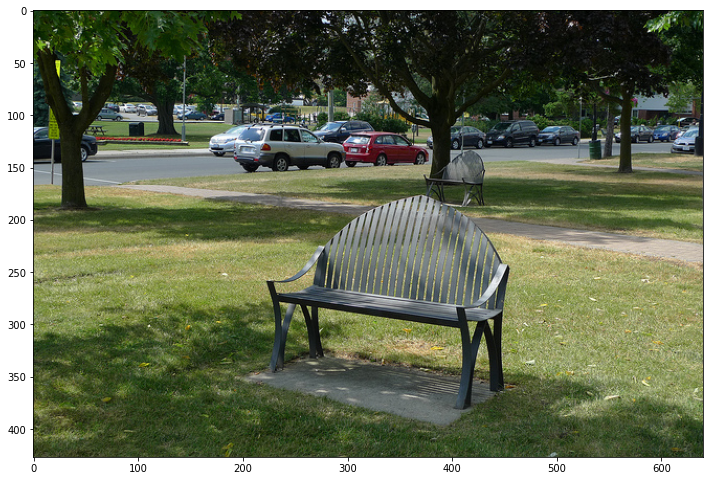

In [12]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg' # '/content/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/demo/demo.jpg'
!ls '/content/mmdetection/demo/demo.jpg' # '/content/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/mmdetection/demo/'
img_arr = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

In [14]:
result = inference_detector(model, img)
print(result)

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
        1.35454327e-01],
       [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
        8.88783410e-02],
       [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
        7.20723420e-02]], dtype=float32), array([], shape=(0, 5), dtype=float32), array([[6.09650024e+02, 1.13805893e+02, 6.34511658e+02, 1.36951904e+02,
        9.88766134e-01],
       [4.81773712e+02, 1.10480980e+02, 5.22459717e+02, 1.30407104e+02,
        9.87157285e-01],
       [1.01822114e+00, 1.12144730e+02, 6.04374733e+01, 1.44173752e+02,
        9.83206093e-01],
       [2.94623718e+02, 1.17035240e+02, 3.78022705e+02, 1.50550873e+02,
        9.71326768e-01],
       [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
        9.67802167e-01],
       [5.90976257e+02, 1.10802658e+02, 6.15401794e+02, 1.26493553e+02,
        9.59414959e-01],
       [2.67582001e+02, 1.05686005e+02, 3.28818756e+02, 1.28226547e+0

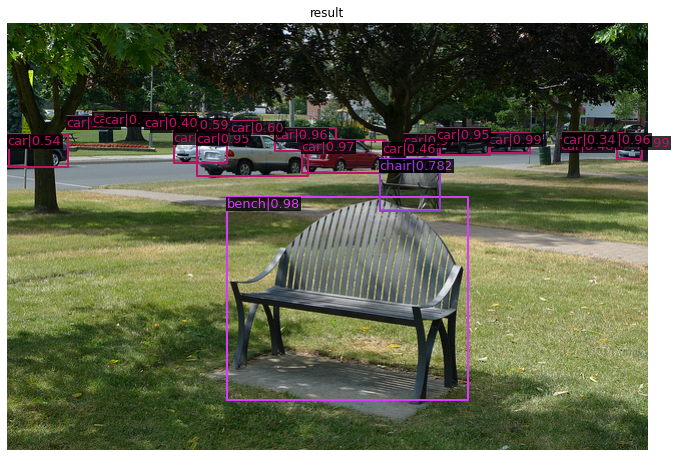

In [15]:
show_result_pyplot(model, img, result)